In [6]:
import numpy as np
import matplotlib.pyplot as plt
!curl https://raw.githubusercontent.com/deehzee/unionfind/master/unionfind.py -O unionfind.py
from unionfind import UnionFind

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8976  100  8976    0     0   254k      0 --:--:-- --:--:-- --:--:--  273k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: unionfind.py


In [7]:
def generar_imagen():
    im = np.zeros((10,10))
    im[3:7, 2:8] = 1
    im[2:5,3:7] = 0
    im[1:2,5:10] = 1
    return im

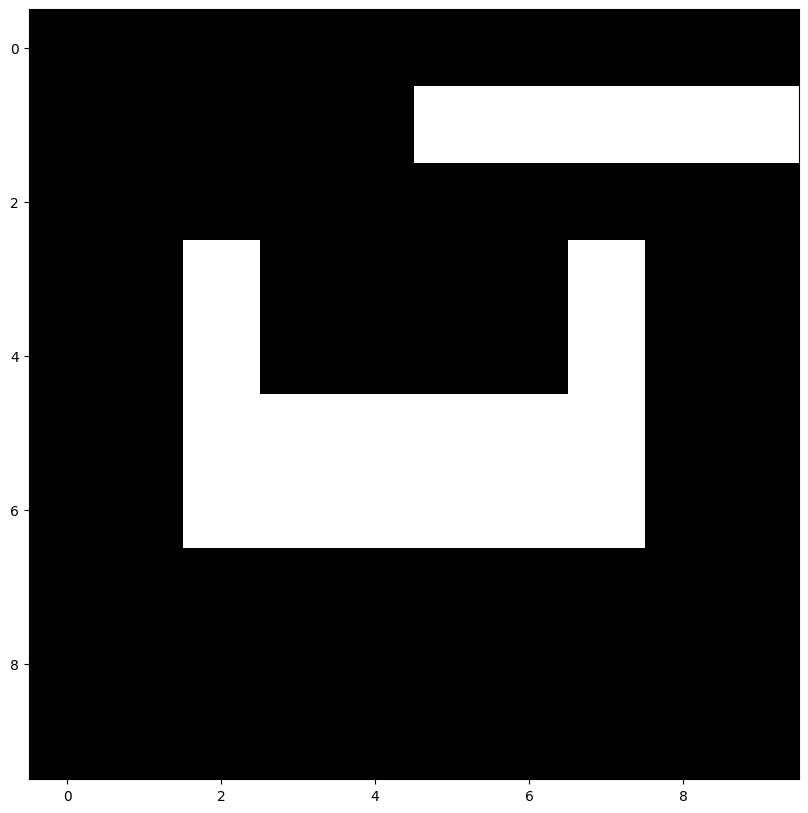

In [8]:
im = generar_imagen()
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')

In [9]:
index = 0
components = np.zeros(im.shape)
uf = UnionFind()
for i in range(1,9):
    for j in range(1,9):
        if im[i,j]==0:
            pass
        elif (components[i,j-1]!=0) and (components[i-1,j]!=0):
            uf.union(components[i,j-1], components[i-1,j])
            components[i,j]=components[i,j-1]
        elif components[i,j-1]!=0:
             components[i,j]=components[i,j-1]
        elif components[i-1,j]!=0:
             components[i,j]=components[i-1,j]
        else:
            index += 1
            uf.union(index,index)
            components[i,j]=index



In [10]:
components


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

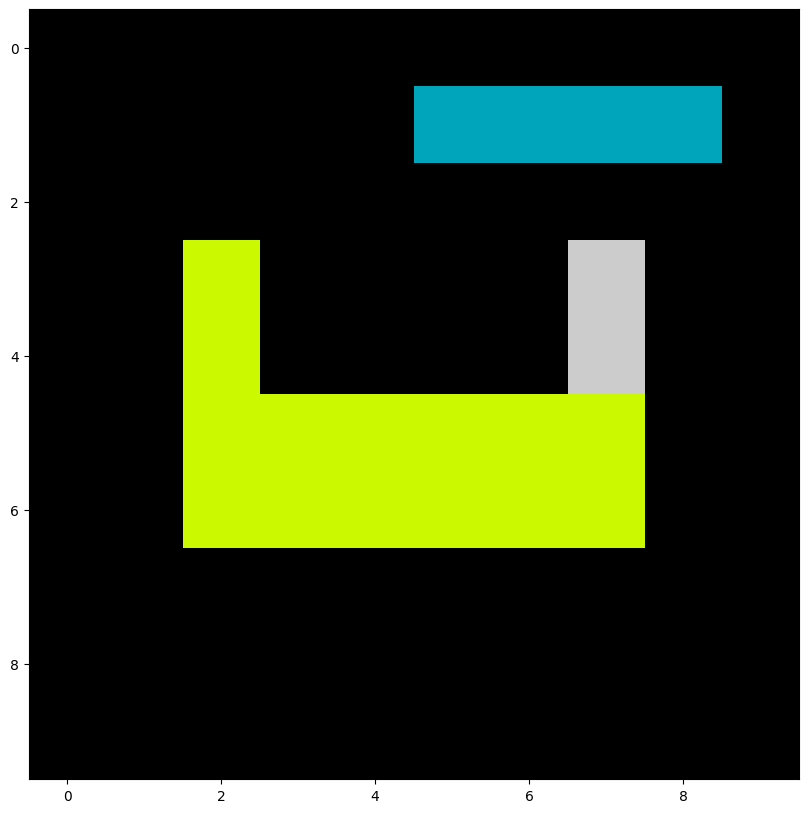

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(components, cmap='nipy_spectral' )

In [12]:
uf.components()

[{1}, {2, 3}]

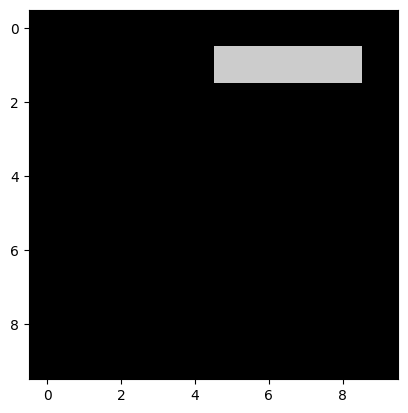

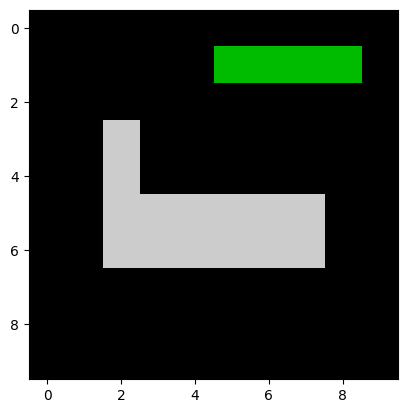

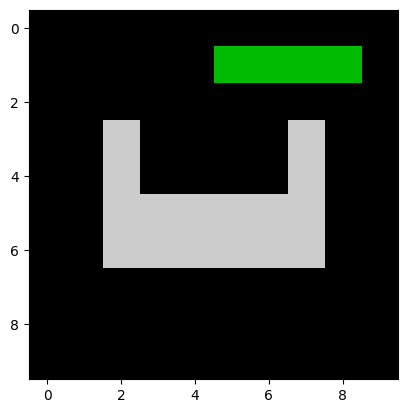

In [13]:
connected_components =np.zeros(im.shape)
for i, s in enumerate(uf.components()):
    for v in s:
        connected_components[components==v] = i+1
        plt.figure()
        plt.imshow(connected_components, cmap='nipy_spectral' )



In [14]:
connected_components

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 2., 2., 2., 2., 2., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### **Usando la implementación de scikit-image**

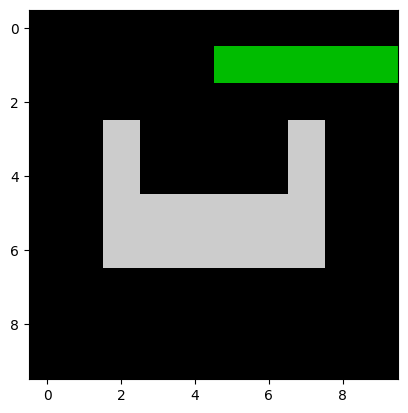

In [15]:
from skimage import measure
connected_components = measure.label(im)
plt.imshow(connected_components, cmap='nipy_spectral' )